# 2D UMAP Visualization

In [17]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
import umap

In [18]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 200, random_state = 7)


X_train = preprocessing.normalize(X_train);
X_test =  preprocessing.normalize(X_test);


## UMAP

In [19]:
mapper = umap.UMAP(n_neighbors=10,min_dist=0.5,n_components=2 ,target_metric='l1',random_state=42).fit(X_train, np.array(Y_train))
test_embedding = mapper.transform(X_test)

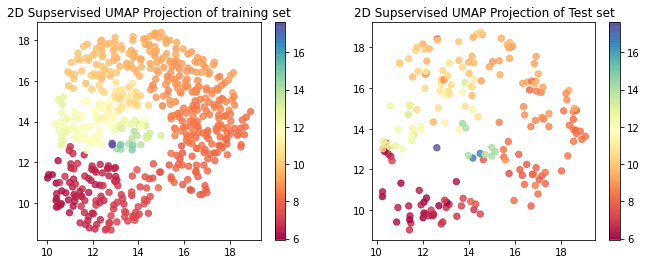

In [20]:
#Plot training sample
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11, 4))
ax1.scatter(*mapper.embedding_.T[:2,:], s=40, c=Y_train, cmap='Spectral', alpha=0.8)
#ax1.setp(ax, xticks=[], yticks=[])
#cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arangege(10))
#cbar.set_ticklabels(classes)
ax1.set_title('2D Supservised UMAP Projection of training set');
#Plot test samples
#fig, ax = plt.subplots((1,2), figsize=(14, 10))
h = ax2.scatter(*test_embedding.T[:2,:], s=40, c=Y_test, cmap='Spectral', alpha=0.8)
#ax2.setp(ax, xticks=[], yticks=[])
#cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)
ax2.set_title('2D Supservised UMAP Projection of Test set');
fig.colorbar(h,ax=ax1)
fig.colorbar(h,ax=ax2)
plt.savefig('2D UMAP projection')